In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
import collections
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

Input Analysis

What are the length distributions of documents and sentences? Any outliers?

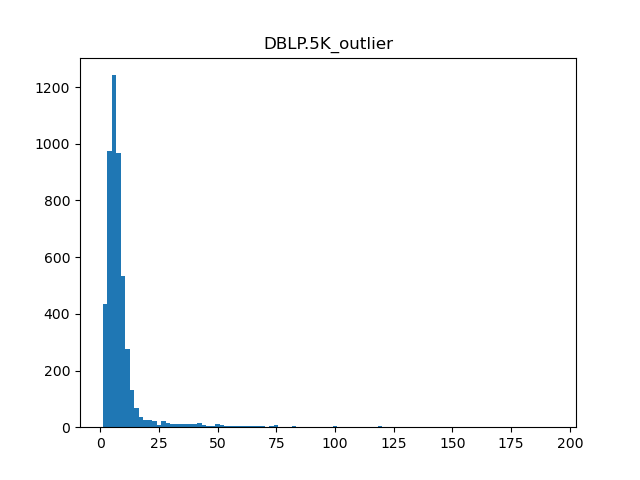

In [4]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

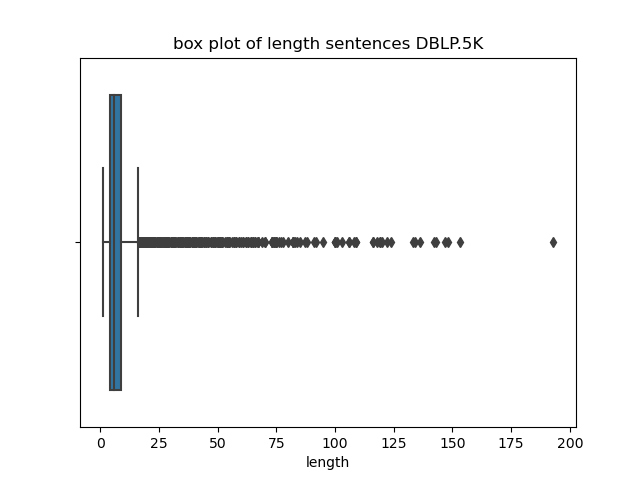

In [5]:
Image("../data/eda/boxplot.png")

After removing the outliers..

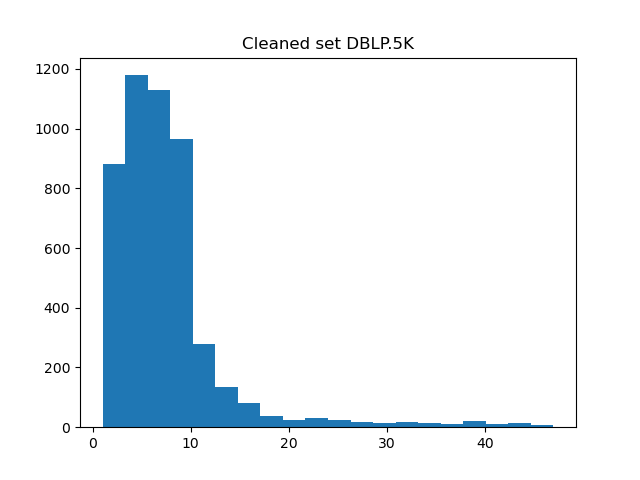

In [6]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

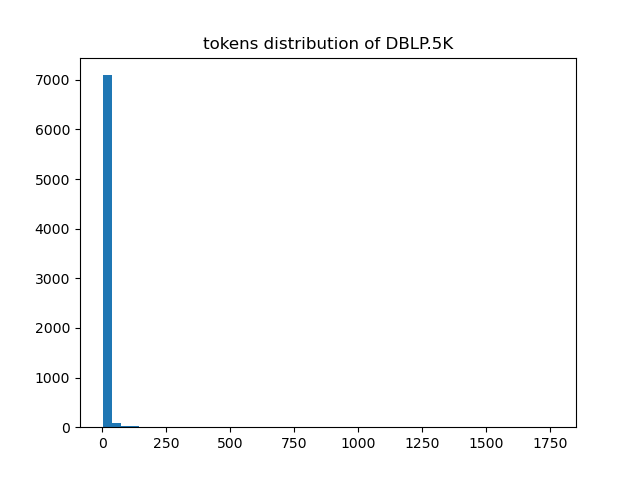

In [7]:
Image("../data/eda/tokens_distribution.png")

In [8]:
f = open("../data/eda/description.txt", "r")
print(f.read())

Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5912.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.


Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

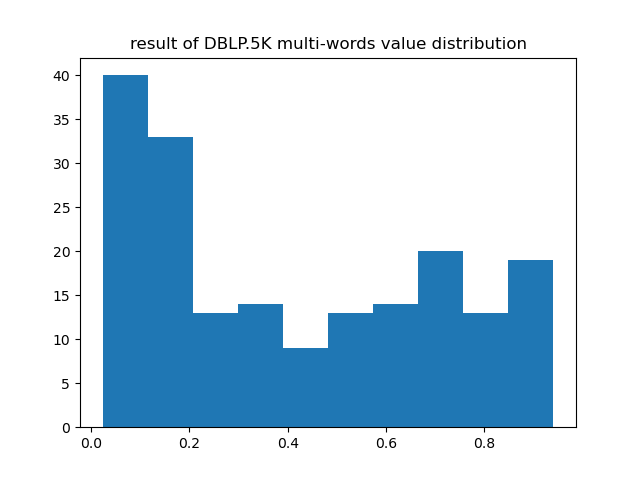

In [9]:
Image("../data/outputs/multi_value_distribution.png")

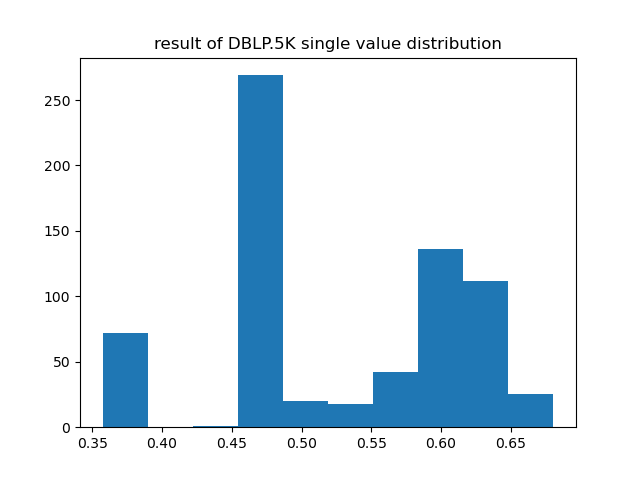

In [10]:
Image("../data/outputs/single_value_distribution.png")

We use the input text analyzing with TF-IDF and generate the word with corresponding quality values. After normalizing, we multiply the value with the Autophrase result and select the top 20 high quality phrases, which make the word cloud much more meaningful than only using the Autophrase itself only.

In [11]:
#tf-idf top 20 for single word
res = pd.read_csv('../data/outputs/tfidfsingle.csv')
res.head(20)

,Word,Score
0,data,1.000000
1,systems,0.993324
2,database,0.941626
3,based,0.678032
4,object,0.663834
5,3d,0.663436
6,databases,0.604709
7,information,0.558284
8,programming,0.544485
9,web,0.491320


In [12]:
#autophrase top 20 single
ds = pd.read_csv('../data/outputs/qualitysingle.csv')
ds.head(20)

,Score,Word
0,0.680712,range
1,0.676111,approach
2,0.675899,language
3,0.675775,programming
4,0.674689,management
5,0.673721,database
6,0.670815,information
7,0.669539,web
8,0.668448,model
9,0.664931,object


In [13]:
#multiplication top 20 single
mul = pd.read_csv('../data/outputs/multiplicationsingle.csv')
mul.head(20)

,Word,Score
0,data,0.646797
1,systems,0.639197
2,database,0.634394
3,object,0.441404
4,based,0.437399
5,databases,0.384442
6,information,0.374505
7,programming,0.367949
8,3d,0.353954
9,web,0.328958


In [14]:
#tf-idf top 20 multi
res = pd.read_csv('../data/outputs/tfidfmulti.csv')
res.head(20)

,Word,Score
0,object oriented,1.000000
1,database systems,0.901920
2,data mining,0.850887
3,information systems,0.472562
4,programming language,0.439176
5,logic programming,0.431335
6,real time,0.424834
7,oriented database,0.382139
8,query processing,0.373452
9,object oriented database,0.352972


In [15]:
#autophrase top 20 multi
ds = pd.read_csv('../data/outputs/qualitymulti.csv')
ds.head(20)

,Score,Word
0,0.940782,programming language
1,0.919778,query language
2,0.912574,logic programming
3,0.911098,information retrieval
4,0.910147,data mining
5,0.910011,relational database
6,0.904385,concurrency control
7,0.894279,programming languages
8,0.892329,object oriented
9,0.891973,machine learning


In [16]:
#multiplication top 20 multi
mul = pd.read_csv('../data/outputs/multiplicationmulti.csv')
mul.head(20)

,Word,Score
0,object oriented,0.892329
1,database systems,0.791948
2,data mining,0.774432
3,programming language,0.413169
4,logic programming,0.393625
5,information systems,0.381125
6,query processing,0.293031
7,knowledge discovery,0.274500
8,information retrieval,0.270662
9,range images,0.259926


Combine everything together, we get the following autophrase quality*tfidf score ranking.

In [17]:
#multiplication top 20 combined
final = pd.read_csv('../data/outputs/multiplicationall.csv')
final.head(40)

,Word,Score
0,object oriented,0.89
1,database systems,0.79
2,data mining,0.77
3,data,0.65
4,systems,0.64
5,database,0.63
6,object,0.44
7,based,0.44
8,programming language,0.41
9,logic programming,0.39


This is for the sentiment analysis of the orginal dataset. Since this a scientific journal, not surprisingly the polarity and subjectivity is zero for most sentences, meaning most of them of quite neutral and objective.

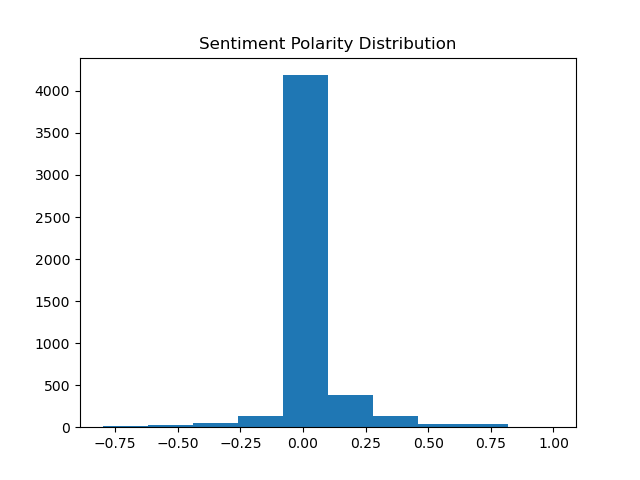

In [18]:
Image("../data/outputs/sentiment_polarity_distribution.png")

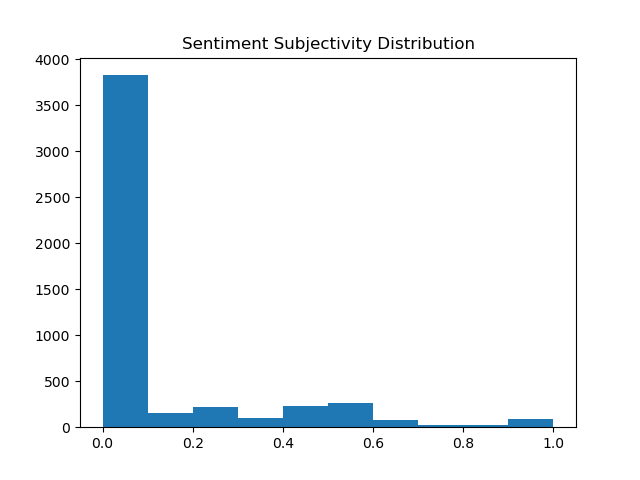

In [19]:
Image("../data/outputs/sentiment_subjectivity_distribution.png")